# Regressao

[**House Prices:** Advanced Regression Techniques](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data)
Utilizando as bases de treinamento e testes disponivel no link apresente duas solucoes de aprendizagem de
maquina que consigam baixas taxas de erro medio (prove que esse e o menor valor que voce
pôde encontrar).

Dica:
- Teste com dois algoritmos de aprendizagem de maquina para identificar os
 que apresentam melhores resultados;


In [1]:
import pandas as pd
import sklearn as sk
from sklearn import model_selection
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns


from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.metrics import confusion_matrix
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor

In [2]:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")
train_df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [3]:
sample = pd.read_fwf("data_description.txt", header=None)
sample

,0,1
0,MSSubClass: Identifies the type of dwelling in...,NaN
1,NaN,NaN
2,20\t1-STORY 1946 & NEWER ALL STYLES,NaN
3,30\t1-STORY 1945 & OLDER,NaN
4,40\t1-STORY W/FINISHED ATTIC ALL AGES,NaN
...,...,...
518,"Abnorml\tAbnormal Sale - trade, foreclosure, ...",NaN
519,AdjLand\tAdjoining Land Purchase,NaN
520,Alloca\tAllocation - two linked properties wit...,", typica"
521,Family\tSale between family members,NaN


## Entendendo a base

### Identificando os tipos dos atributos

O primeiro passo é identificar como estão distribuidos os dados e seus tipos.

In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

#### Informações Relevantes

- Primeiro ponto é observar que existem muitas instancias categóricas
- Podemos observar que existem muitas colunas com valores vazio.

In [5]:
missing = train_df.isna().mean()
missing[missing.gt(0)]

LotFrontage     0.177397
Alley           0.937671
MasVnrType      0.005479
MasVnrArea      0.005479
BsmtQual        0.025342
BsmtCond        0.025342
BsmtExposure    0.026027
BsmtFinType1    0.025342
BsmtFinType2    0.026027
Electrical      0.000685
FireplaceQu     0.472603
GarageType      0.055479
GarageYrBlt     0.055479
GarageFinish    0.055479
GarageQual      0.055479
GarageCond      0.055479
PoolQC          0.995205
Fence           0.807534
MiscFeature     0.963014
dtype: float64

### Removendo atributos defasados

Antes de remover os vazios devemos compreender o que esses atributos representam e como estão classificados.

In [6]:
#Linear feet of street connected to property(Calçada??)
train_df["LotFrontage"].unique()

array([ 65.,  80.,  68.,  60.,  84.,  85.,  75.,  nan,  51.,  50.,  70.,
        91.,  72.,  66., 101.,  57.,  44., 110.,  98.,  47., 108., 112.,
        74., 115.,  61.,  48.,  33.,  52., 100.,  24.,  89.,  63.,  76.,
        81.,  95.,  69.,  21.,  32.,  78., 121., 122.,  40., 105.,  73.,
        77.,  64.,  94.,  34.,  90.,  55.,  88.,  82.,  71., 120., 107.,
        92., 134.,  62.,  86., 141.,  97.,  54.,  41.,  79., 174.,  99.,
        67.,  83.,  43., 103.,  93.,  30., 129., 140.,  35.,  37., 118.,
        87., 116., 150., 111.,  49.,  96.,  59.,  36.,  56., 102.,  58.,
        38., 109., 130.,  53., 137.,  45., 106., 104.,  42.,  39., 144.,
       114., 128., 149., 313., 168., 182., 138., 160., 152., 124., 153.,
        46.])

In [7]:
#Fireplace quality(Qualidade da lareira??) 
train_df['FireplaceQu'].unique()
#Ex   Excellent - Exceptional Masonry Fireplace
#Gd   Good - Masonry Fireplace in main level
#TA   Average - Prefabricated Fireplace in main living area or Masonry Fireplace in basement
#Fa   Fair - Prefabricated Fireplace in basement
#Po   Poor - Ben Franklin Stove
#NA   No Fireplace

array([nan, 'TA', 'Gd', 'Fa', 'Ex', 'Po'], dtype=object)

In [8]:
#Tipo de Garagem??
train_df['GarageType'].unique()
#2Types   More than one type of garage
#Attchd   Attached to home
#Basment  Basement Garage
#BuiltIn  Built-In (Garage part of house - typically has room above garage)
#CarPort  Car Port
#Detchd   Detached from home
#NA   No Garage

array(['Attchd', 'Detchd', 'BuiltIn', 'CarPort', nan, 'Basment', '2Types'],
      dtype=object)

In [9]:
#Beco
train_df["Alley"].unique()
# Grvl Gravel (Cascalho)
# Pave Paved (Pavimentado)
# NA   No alley access (Sem beco)

array([nan, 'Grvl', 'Pave'], dtype=object)

### Aqui podemos ver que os atributos não estão vazios, e sim que são classes reais. WoW 

Assim não é possivel substituir esses valores que estão NaN, pela moda ou por mediana.. estariamos inserindo ruido na base, pois uma casa que não tem garagem é menos valorizada que uma casa que possui garagem coberta.
Uma solução para este problema é transformar os dados categoricos em numéricos:

Exeplo: Alley
- NA = 0
- Pave = 1
- Grvl = 2

### Como os dados estão relacionados (Heatmap)

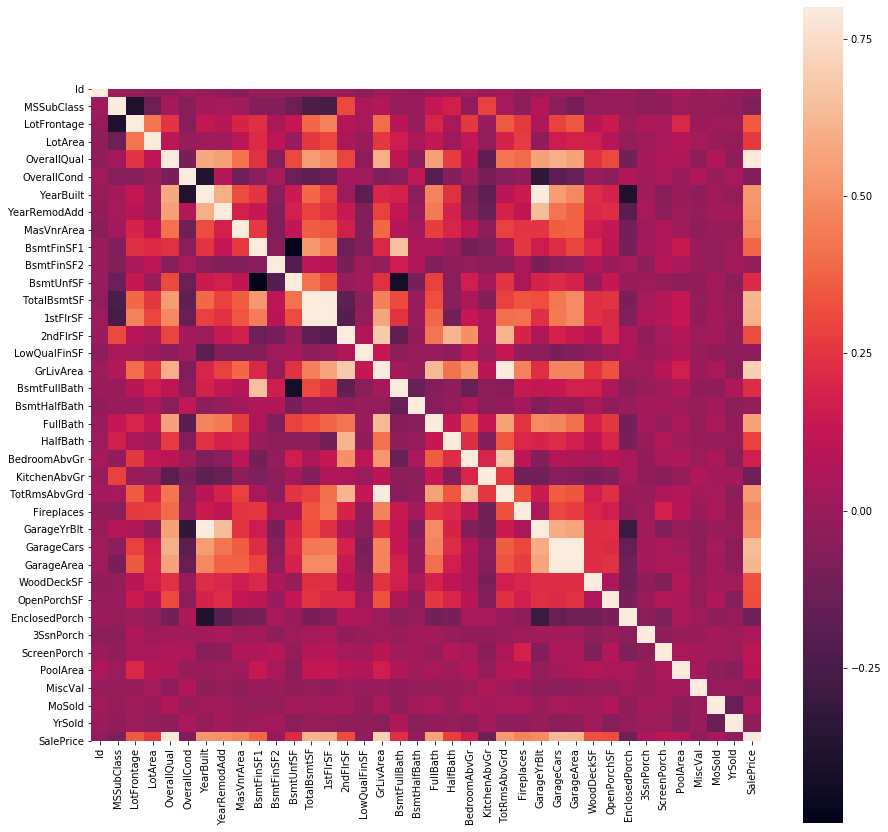

In [10]:
heatmap =  train_df.corr()
f, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(heatmap, vmax=.8, square=True);

### Transformando dados

- Precisamos alterar esses dados que estão como categóricos para valores numéricos. Uma forma de fazer isso é utilizando a função get_dummies que faz one-hot-enconding das classes, transformando em colunas.
- Um procedimento semelhante é necessário para os atributos numéricos, que possuem valores muito baixos ou então grandes demais, então precisam ser uniformizados


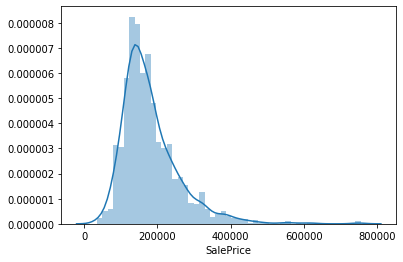

In [11]:
sns.distplot(train_df['SalePrice'])

### Salvando os dados de SalePrice

- SalePrice é um dado que precisa ser tratado de forma mais controlada. a normalização pode afetar sua grandeza. A função utilizada faz um range de valores entre -1 e 1.

- Para transforma-lo utilizei a função np.log

In [12]:
saleprice_feat = train_df['SalePrice']


#Aplicando transformação logaritmica
saleprice_feat = np.log(saleprice_feat)


train_df = train_df.drop('SalePrice', axis=1)


In [13]:
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


## Transformando

In [14]:
# Hot Encoding
categorical_features = train_df.select_dtypes("object").columns.values

# StandardScaler
numeric_features = train_df.select_dtypes('int64').columns.values

In [15]:
scaler = StandardScaler()

df_scaled = pd.concat([
    pd.get_dummies(train_df[categorical_features]), 
    pd.DataFrame(scaler.fit_transform(train_df[numeric_features]), columns=numeric_features),
    saleprice_feat],
    axis=1)


df_scaled.head(3)
df_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 287 entries, MSZoning_C (all) to SalePrice
dtypes: float64(35), uint8(252)
memory usage: 758.6 KB


# Aplicando Regressão

## MLP Regressão

In [16]:
df_train, df_test = sk.model_selection.train_test_split(df_scaled, test_size=0.2, shuffle=True)

mlp = MLPRegressor(learning_rate="adaptive", max_iter=300)

mlp.fit(df_train.drop("SalePrice", axis=1), df_train["SalePrice"])

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(100,), learning_rate='adaptive',
             learning_rate_init=0.001, max_iter=300, momentum=0.9,
             n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
             random_state=None, shuffle=True, solver='adam', tol=0.0001,
             validation_fraction=0.1, verbose=False, warm_start=False)

In [17]:
y_predicted = mlp.predict(df_test.drop("SalePrice", axis=1))
y_true = df_test["SalePrice"]

sk.metrics.r2_score(y_true, y_predicted)

0.6870397180542352

### MSE - MLP

In [18]:
sk.metrics.mean_squared_error(y_true, y_predicted)

0.04832644455857445

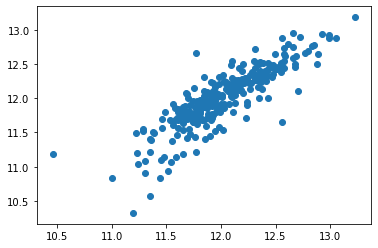

In [19]:
plt.scatter(y_true, y_predicted)

## KNN

In [20]:
knn = KNeighborsRegressor(n_neighbors=2)
knn.fit(df_train.drop("SalePrice", axis=1), df_train["SalePrice"]) 

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                    weights='uniform')

In [21]:
y_predicted = knn.predict(df_test.drop("SalePrice", axis=1))
y_true = df_test["SalePrice"]

sk.metrics.r2_score(y_true, y_predicted)

0.8166867425293217

### MSE - KNN

In [22]:
sk.metrics.mean_squared_error(y_true, y_predicted)

0.028306716491083815

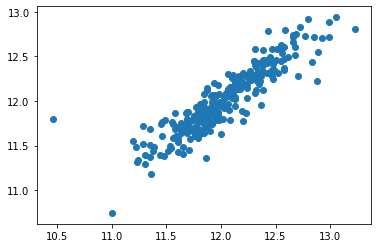

In [23]:
plt.scatter(y_true, y_predicted)

## Lasso

O Lasso é um modelo linear que estima coeficientes esparsos. É útil em alguns contextos devido à sua tendência de preferir soluções com menos coeficientes diferentes de zero, reduzindo efetivamente o número de recursos dos quais a solução fornecida depende. Por esse motivo, Lasso e suas variantes são fundamentais para o campo da detecção compactada. Sob certas condições, ele pode recuperar o conjunto exato de coeficientes diferentes de zero

In [24]:
las = Lasso(alpha=0.1)
las.fit(df_train.drop("SalePrice", axis=1), df_train["SalePrice"])

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

### Score

In [25]:
y_predicted = las.predict(df_test.drop("SalePrice", axis=1))
y_true = df_test["SalePrice"]

sk.metrics.r2_score(y_true, y_predicted)

0.7263880830877991

### MSE - Lasso

In [26]:
sk.metrics.mean_squared_error(y_true, y_predicted)

0.042250380946148997

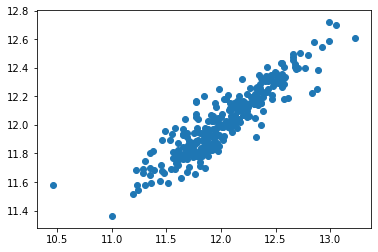

In [27]:
plt.scatter(y_true, y_predicted)

## Ridge

A regressão de Ridge aborda alguns dos problemas dos Mínimos Quadrados Ordinários, impondo uma penalidade no tamanho dos coeficientes.

In [28]:
rid = Ridge(alpha=0.5)
rid.fit(df_train.drop("SalePrice", axis=1), df_train["SalePrice"])

Ridge(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [29]:
y_predicted = rid.predict(df_test.drop("SalePrice", axis=1))
y_true = df_test["SalePrice"]

sk.metrics.r2_score(y_true, y_predicted)

0.9145623639704931

### MSE - Ridge

In [30]:
sk.metrics.mean_squared_error(y_true, y_predicted)

0.01319303892214399

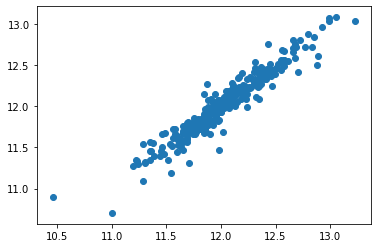

In [31]:
plt.scatter(y_true, y_predicted)